## Imports

In [1]:
# Import some "default" libraries
# You can now use Pandas to manipulate the Dataframe conveniently

''' Data manipulation'''
import numpy as np
import pandas as pd

''' Data visualization'''
import matplotlib.pyplot as plt
import seaborn as sns

# 🚀 Emlak - Gelişmiş Tahminleyici


❗️ Önceki görevde, veri setimizdeki daire sayısı ($\large n$ gözlem $\large> p$ özellik) özellik sayısından fazla olduğunda $\large \boldsymbol X \cdot \boldsymbol \theta = \boldsymbol y $ denklemini "çözemedik". $\large \boldsymbol \theta$ için deterministik bir formül olmadan, yeni dairelerin fiyatlarını tahmin edemezdik!


----


🎯 Bu alıştırmada artık 1000 daireden oluşan daha büyük bir veri setine erişimimiz var ve daha öncekiyle aynı yeni daire için tahminimizi geliştirmek istiyoruz:


- `Surface`: 3000 $ft^2$


- `Bedrooms`: 5 
- `Floors`: 1


❌ $\large \boldsymbol X \cdot \boldsymbol \theta = \boldsymbol y $ denklemini, şekli $ (1000,4)$ olan **`terslenemez`** bir matris $\large \boldsymbol X$ ile çözmek yerine...


🚀 ...$\large {\boldsymbol \theta} = \begin{bmatrix}

     \theta_0 \\

     \theta_1 \\

    \theta_2 \\

     \theta_3

\end{bmatrix}_{4 \times 1}$ vektörünü, hata $ \large \boldsymbol e = \boldsymbol X \cdot \hat{\boldsymbol \theta} - \boldsymbol y  $ en küçük olacak şekilde bulacağız.


Bu bir **`Doğrusal Regresyon Modeli`**dir. Hata $\boldsymbol e$'yi Öklidyen mesafe $\large \left\|\boldsymbol e\right\|$ ve **`Ortalama Kare Hata (MSE)`** ile ölçeceğiz.


👉 $\large \hat{\boldsymbol \theta}$ değerini hesaplayarak yeni dairenin fiyatına yaklaşık bir tahmin bulalım.

## (1) Veri Keşfi


Aşağıda `flats.csv` veri setini yüklüyoruz

In [2]:
flats = pd.read_csv('https://d32aokrjazspmn.cloudfront.net/materials/flats.csv')
flats.head(10)

,price,bedrooms,surface,floors
0,274.0,3,1830,2.0
1,500.0,4,2120,1.0
2,320.0,3,1260,1.0
3,445.5,3,1880,1.0
4,637.5,3,1680,1.0
5,460.0,2,2730,1.0
6,259.0,3,1270,1.5
7,950.0,3,2780,1.0
8,550.0,3,1930,2.0
9,265.5,3,1860,1.0


👀 Fiyatlar hakkında en fazla bilgiyi hangi özelliğin verdiğini görsel olarak anlamak için `sns.scatterplot()` kullanın:

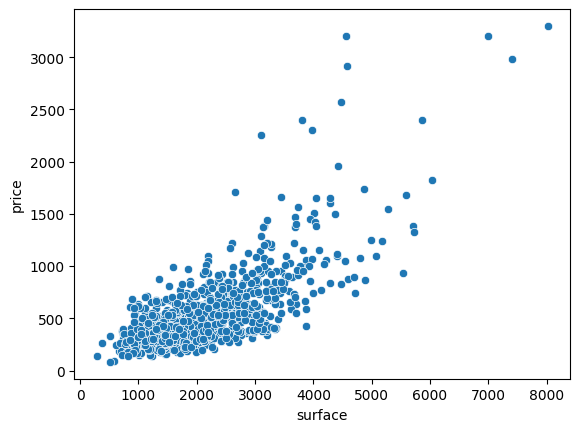

In [3]:
sns.scatterplot(data=flats, x='surface', y='price')
plt.show()

👉 Görünüyor ki `surface` fiyat için yatak odası veya kat sayısından daha güçlü bir gösterge. İstatistikte, `price`'ın diğer özelliklere göre `surface` ile daha **ilişkili** olduğunu söyleriz.


👉 Bunu, DataFrame'deki her sütun çifti arasındaki korelasyon katsayılarını hesaplayan [`pandas.DataFrame.corr`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html) ile kontrol edelim.


<i> <u>Dikkat çekici değerler:</u></i>

* 1: İki sütun tamamen korelasyonlu 📈

* -1: İki sütun tamamen ters korelasyonlu 📉

* 0: İki sütun *doğrusal* olarak korelasyonlu değil 😐

    
<details>
    <summary><i>Korelasyon katsayısı neden kovaryans yerine kullanılır?</i></summary>

✅ <u>Benzerlikler</u>:

    
- 📈 Pozitif korelasyonlar ve pozitif kovaryanslar: X artarsa Y de artar, tersi de geçerli.
- 📉 Negatif korelasyonlar ve negatif kovaryanslar: X artarsa Y azalır, tersi de geçerli.
- 🤔 Sıfır korelasyon ve sıfır kovaryans: 
    - _Doğrusal olarak_ ilişkili değiller, yani $ Y = aX + b$ gibi bir ilişki yok.
    - Ancak $Y = X^{2}$ (kuadratik), $Y = e^{X}$ (üstel), $Y = ln(X)$ (logaritmik), $Y = sin(\sqrt{1+X^7})$ (çok tuhaf) gibi başka ilişkiler olabilir.

❗️<u>Ana farklar</u>:

- 😖 Kovaryans $ cov(X, Y) \in ( - \infty ; + \infty ) $ aralığında olabilir ve karşılaştırmak zordur.
    Örnek: $ cov (X, Y) = 10 $ ve $ cov (X, Z) = 30 $ ise X ve Z daha mı ilişkili? _Hayır_, çünkü birimleri farklı olabilir.

    🧑🏻‍🏫 Çözüm: Korelasyon kullanılır, genellikle $\rho$ harfiyle gösterilir.

👉 <u>Sonuç</u>:

- Korelasyon, kovaryansın standartlaştırılmış halidir: kovaryansı X ve Y'nin standart sapmasına böleriz.
$$ \large  \rho(X,Y) = \frac{cov(X,Y)}{\sigma_X \sigma_Y} \in [0;1]$$

Örnek: $ \rho(X, Y) = 0.80 $ ve $ \rho(X, Z) = 0.15 $ ise, X ve Y daha çok ilişkilidir!
</details>

In [ ]:
# YOUR CODE HERE

🎨 Bu matrisi hızlıca görmek için [`seaborn.heatmap`](https://seaborn.pydata.org/generated/seaborn.heatmap.html) ile bir **ısı haritası** kullanabilirsiniz.


<details>
    <summary><i>Daha güzel bir korelasyon matrisi için ipuçları</i></summary>

- `cmap`: **Seaborn** bir görselleştirme kütüphanesi olduğu için, [`cmap`](https://matplotlib.org/stable/tutorials/colors/colormaps.html) argümanını kullanabilirsiniz.
- `annot`: Korelasyon katsayılarını doğrudan renkli harita üzerinde gösterebilirsiniz.
- `annot_kws`: Korelasyon katsayılarının görünümünü özelleştirebilirsiniz.
</details>

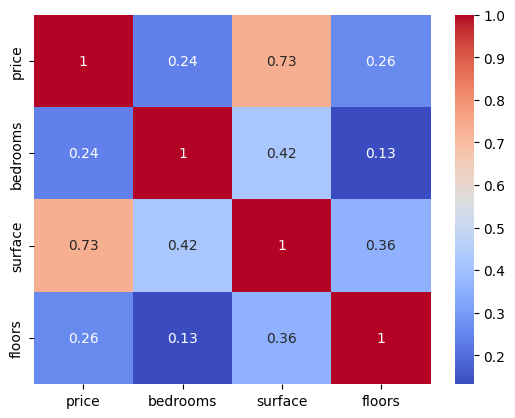

In [4]:
corr_matrix = flats.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

**🧪 Test your code!**

In [5]:
from nbresult import ChallengeResult

result = ChallengeResult(
    'flats',
    shape=flats.shape,
    columns=flats.columns
)

result.write()
print(result.check())


============================= test session starts ==============================
platform linux -- Python 3.12.9, pytest-8.3.4, pluggy-1.5.0 -- /home/tumay/.pyenv/versions/workintech/bin/python
cachedir: .pytest_cache
rootdir: /home/tumay/code/data-real-estate-advanced-estimator/tests
plugins: anyio-4.8.0, dash-3.3.0, typeguard-4.4.2
collecting ... collected 2 items

test_flats.py::TestFlats::test_columns PASSED                            [ 50%]
test_flats.py::TestFlats::test_shape PASSED                              [100%]

============================== 2 passed in 0.37s ===============================


💯 You can commit your code:

git add tests/flats.pickle

git commit -m 'Completed flats step'

git push origin master



## (2) 1 Özellikli Tahminleyici


Sadece bir özellik olan **surface** ile **price** için istatistiksel bir tahminleyici oluşturalım.


🎯 İki değişken arasında **doğrusal regresyon** kuralım.


Pratikte, $\hat{\boldsymbol \theta}$ = (`eğim`, `kesişim`) parametrelerini öyle seçmek istiyoruz ki, `tahmini fiyat = eğim * surface + kesişim` ifadesi, Ortalama Kare Hata (MSE) açısından `price` değerine en yakın olsun.


📅 Önümüzdeki haftalarda farklı modelleri (Doğrusal Regresyon, KNN, Lojistik Regresyon, Sinir Ağları, vb.) keşfedeceğiz.


👉 Önemli bir işiniz doğru modeli seçmek ve parametreleri optimize ederek en iyi tahminleri yapmaktır.

### (2.1) Görsel Yaklaşım

❓`plot_line(slope, intercept)` fonksiyonunu yazın


Bu fonksiyon, `slope` ve `intercept` argümanları verildiğinde bir `predicted_price` dizisi oluşturur ve bu diziyi orijinal (dağılmış) verinin üstüne çizer.


Fonksiyonu yazdıktan sonra, farklı `(slope, intercept)` değerleriyle oynayarak veriye "iyi bir doğrusal yaklaşım" bulmaya çalışın. En iyi uyumu bulabilir misiniz?


Görsel örnek:


<img src="https://wagon-public-datasets.s3.amazonaws.com/03-Maths/01-Algebra-Calculus/line_of_best_fit.png" width=400>

In [ ]:
def plot_line(data, slope, intercept):
    # First, we'll create x - an array of our independent variable values - for you.
    x = data['surface']

    # Now create an array of predicted prices using the predicted prices formula above
    # Remember, we can do mathematical operations on an entire array at once!
    y_pred = None
    

    # Finally, let's plot the line!
    plt.plot(x, y_pred);

Fonksiyonunuzu aşağıdaki hücreyi çalıştırarak test edin, ardından iyi bir en küçük hata doğrusu bulmak için değerleri değiştirin!


*İpucu: Aynı hücrede `plot_line()` fonksiyonunu birden fazla kez çalıştırarak aynı dağılım grafiğinde birden fazla doğru çizebilirsiniz* 😉

In [ ]:
sns.scatterplot(x="surface", y="price", data=flats)
plot_line(flats, 1, 1)

😅 O kadar da kolay (ve çok "bilimsel" değil), değil mi?

### (2.2) Hesaplamalı Yaklaşım


🔥 Tahminleyici doğrunun en iyi olmasını sağlamak için, **gerçek fiyatlar** ile **tahmini fiyatlar** arasındaki **Ortalama Kare Hata**yı (MSE) hesaplamamız gerekir!


👉 Unutmayın:


- Her daire için `tahmini_fiyat = eğim * surface + kesişim`


- Hem **gerçek fiyat vektörü** hem de **tahmini fiyat vektörü** $ (1000, 1)$ boyutunda

#### (2.2.1) Kare Hatalar

<u><b>Adım 1</b></u>


❓Her satır (_yani daire_) için `squared_error = (price - predicted_price)**2` hesaplamalıyız❓

In [ ]:
def compute_squared_errors(slope, intercept, surfaces, prices):
    """
    TODO: return an array containing the squared errors between
    all real prices from the dataset and the predicted prices
    """
    pass  # YOUR CODE HERE

💡 Veri Bilimi/Modelleme'de genel bir ilke: $ \large error = f(\boldsymbol y, \hat{\boldsymbol y})$ burada:


- $ \large \boldsymbol y $ gerçek değer


- $ \large \hat{\boldsymbol y} $ tahmini değer


- $ \large f$ genellikle **Kayıp Fonksiyonu** veya **Maliyet Fonksiyonu** olarak adlandırılır 
    - 📆 `Makine Öğrenmesi I > Model Ayarı`

#### (2.2.2) Ortalama Kare Hata (MSE)

<u><b>Adım 2</b></u>


❓ `mse` fonksiyonunu oluşturun, bu fonksiyon `squared_errors` fonksiyonundan dönen dizinin ortalamasını döndürmeli. ❓

In [ ]:
def compute_mse(slope, intercept, surfaces, prices):
    '''TODO: Return the mean of the array contained in squared_errors as a float.'''
    pass  # YOUR CODE HERE

👉 _(2.1) Görsel yaklaşım_ bölümünde, "en iyi doğruyu" yani en iyi `(slope, intercept)` çiftini görsel olarak tahmin etmeye çalıştınız.


❓Bu "en iyi çifti" kullanarak tahminleyicinizin MSE'sini hesaplayın. ❓

In [ ]:
# YOUR CODE HERE

### (2.3) En İyi Parametreleri Bulmak


👉 Farklı `slope` ve `intercept` değerleriyle oynamaya devam edin ve en iyi uyumu elde etmeye çalışın! İki parametreyi aynı anda optimize etmenin ne kadar zor olduğunu fark edin.


👇 Aşağıdaki adımları izleyerek olası bir yaklaşım görebilirsiniz:

#### (2.3.1) En İyi Eğim Değerini Bulmak

<b><i><u> Adım 1 :</u></i></b>


`initial_intercept` için en iyi tahmininizi sabitleyerek başlayın, ardından yaklaşık olarak `mse = f(slope)` fonksiyonunu en aza indiren eğimi bulun

In [ ]:
# Define an initial_intercept, for instance, we may suppose there is always a small transaction fee even for very small flats


In [ ]:
# Create a range of 100 slopes that contains what you believe is the optimal slope (hint: np.linspace())


In [ ]:
# Create the list of MSEs for each slope value


❓MSE'leri eğimlere karşı çizin. Bir minimum görüyor musunuz❓


🙃 Görmüyorsanız, başka bir eğim aralığı deneyin!

In [ ]:
# YOUR CODE HERE

❓`initial_intercept` için MSE'nin minimum değerini ve karşılık gelen `slope_best` değerini hesaplayın❓


<details>
    <summary><i>İpucu</i></summary>
    
Burada Python'un yerleşik `.min()` fonksiyonunu ve `List.index()` metodunu kullanabilirsiniz
    
</details>

In [ ]:
# YOUR CODE HERE

#### (2.3.2) En İyi Kesişim Değerini Bulmak

<b><i><u> Adım 2 :</u></i></b>


🔨 Şimdi, eğimi `slope_best` değerine sabitleyin ve önceki yaklaşımı tekrar kullanarak "en iyi" `intercept_best` değerini bulun.

In [ ]:
# Create a range of 100 intercepts that contains what you believe is the optimal intercept


In [ ]:
# Create the list of MSEs for each intercept value


In [ ]:
# Plot MSEs against intercepts. Do you see a minimum? If not, try another range of slopes!


❓Eğim `slope_best` olduğunda MSE'lerin minimum değeri olan `mse_min`'i ve karşılık gelen en iyi kesişimi `intercept_best` olarak hesaplayın❓



In [ ]:
mse_min = None
intercept_best = None

In [ ]:
# YOUR CODE HERE

**🧪 Test your code!**

In [ ]:
from nbresult import ChallengeResult

result = ChallengeResult(
    'univariate',
    mse_min=mse_min,
    slope_best=slope_best,
    intercept_best=intercept_best
)

result.write()
print(result.check())

🎉 **Harika iş**! Sıfır olmayan bir kesişim parametresi ekleyerek MSE'yi daha da azalttık (yaklaşık uyumu görsel olarak doğrulamak için regresyon doğrusunu dağılım grafiğinizde çizebilirsiniz).


❓Peki, bu (`intercept_best`, `slope_best`) parametrelerinin gerçekten en iyi değerler olduğuna ne garanti verir? 

<details>
    <summary>👀 Açıklamalar (<strong>bunu dikkatlice okuyun!</strong>)</summary>


Belki de adım ①'i tekrar ederek, bu sefer kesişimi `intercept_best`'e sabitleyip, ardından adım ②'yi yeni eğimle tekrar ederek daha iyi bir eğim değeri bulabiliriz.


İki parametreli bir fonksiyonun `rmse = f(slope, intercept)` global minimumunu bulmak için, adım ① ve ②'yi sonsuza kadar tekrarlamamız gerekebilir - başarı garantisi olmadan.


<img src='https://wagon-public-datasets.s3.amazonaws.com/data-science-images/decision-science/real-estate-minimizer.png'>


💪 Makine Öğrenmesinin en temel yönlerinden birini keşfettiniz: **minima bulma sürecinin tekrarlılığı**.


👉 Tahmin edebileceğiniz gibi, Veri Bilimi dünyasında bu tür süreçleri otomatikleştiren ve optimize eden algoritmalar geliştirilmiştir. Sonraki ünitelerde, bu tekrarlama işlemini sizin için yapan **Gradient Descent** gibi algoritmaların gücünü keşfedeceksiniz.
</details>

👉 Merak ediyorsanız ve bu veri seti için gerçek en iyi eğim ve kesişimi bulmak istiyorsanız aşağıdaki hücreleri çalıştırın.

In [ ]:
# Try this out (Seaborn visual solution)
sns.regplot(data=flats, x='surface', y='price');

In [ ]:
# Try this out (statsmodels, exact solution)!
import statsmodels.formula.api as smf

regression = smf.ols(formula= 'price ~ surface', data=flats).fit()

print("intercept_best", regression.params['Intercept'])
print("slope_best", regression.params['surface'])
print('mse_best: ', np.mean(regression.resid**2))

❓Başlangıç sorumuza geri dönelim: Aşağıdaki 5. daire için yeni tahmininiz nedir? Sadece 4 daireye dayalı ilk tahmininizle nasıl karşılaştırılır?


- `surface`: 3000 $ft^2$


- `bedrooms`: 5 
- `floors`: 1

In [ ]:
# compute predicted price (Remember that the real price is 750,000$)
pass  # YOUR CODE HERE

☝️ Sadece 4 daireye dayalı ilk deterministik tahminleyicimizden daha iyi, ancak bu tahminde yatak odası ve kat sayısının sağladığı bilgiyi kaçırıyoruz!

## (3) _Tüm_ Özelliklerle Tahminleyici (`surface`, `bedrooms`, `floors`)?

💡 Üç özellikli bir doğrusal regresyon (**Çok Değişkenli Doğrusal Regresyon**) tek özellikliyle aynı şekilde çalışır, ancak RMSE'yi en aza indirmek için sadece 2 parametre değil, 4 parametre bulmamız gerekir: $\hat{\boldsymbol \theta}$ = (`intercept`, `slope_surface`, `slope_bedrooms`, `slope_floors`).


🗓 Bu **Çok Değişkenli Doğrusal Regresyon**u **Karar Bilimi** modülünde daha ayrıntılı inceleyeceğiz.


🗓 Kapalı analitik çözümle (bir sonraki bölümde göreceksiniz) Ordinary Least Squares regresyonu hesaplanabilir, ancak hesaplama açısından çok karmaşık olabilir.


🗓 Bu yüzden genellikle yukarıda bahsedilen **Gradient Descent** gibi yinelemeli yöntemler kullanılır. Makine Öğrenmesinde çok güçlü ve önemli bir yöntemdir ve bootcamp'te kendiniz kodlayacaksınız.


👉 Bu arada, aşağıdaki hücreyi çalıştırarak bu çok değişkenli regresyonun nihai sonucunu görebilirsiniz:

In [ ]:
# Find the four regression coefficients by running this cell
regression = smf.ols(formula= 'price ~ surface + bedrooms + floors', data=flats).fit()
regression.params

🎉 Artık en iyi parametreleri bulduğumuza göre $\boldsymbol {\hat \theta}= \begin{bmatrix}

     \theta_0 \\

     \theta_1 \\

    \theta_2 \\

     \theta_3 \\

\end{bmatrix}_{4 \times 1} = 
\begin{bmatrix}

     \theta_{intercept} \\

     \theta_{surface}\\

    \theta_{bedrooms} \\

     \theta_{floors}

\end{bmatrix}_{4 \times 1} = 
\begin{bmatrix}

    18.154854 \\

    0.286953 \\

    -21.623564 \\

    -3.811868

\end{bmatrix}_{4 \times 1}

$, 


yeni dairenin fiyatını tahmin edebiliriz:

* $3000 ft^2$

* $5$ yatak odası

* $1.$ katta


$$ \hat{y_5} = \theta_0 + \theta_1 \times 3000 + \theta_2 \times 5 + \theta_3 \times 1 $$

In [ ]:
# Compute the newly predicted price for the 5th flat? Is this prediction better?
pass  # YOUR CODE HERE

## (4) Concluding Remarks on Linear Algebra 🧠

Bu **optimizasyon problemi** şöyle özetlenebilir:


- $\hat{\boldsymbol \theta} = \begin{bmatrix}

     \theta_{intercept} \\

     \theta_{surface}\\

    \theta_{bedrooms} \\

     \theta_{floors}

\end{bmatrix}_{4 \times 1}$ vektörünü bulmamız gerekir.


- $e = \left\|\boldsymbol X\cdot \hat{\boldsymbol \theta} - \boldsymbol y  \right\|^2$ hatasını en küçük yapanı bulmamız gerekir.


- Özellikler matrisi $\boldsymbol X$ [sabit, surfaces, floors, bedrooms]  $\begin{bmatrix}

    1 & 620 & 1 & 1 \\

    1 & 3280 & 4 & 2 \\

    ... \\

    1 & 1900 & 2 & 2 \\

    1 & 1320 & 3 & 3

   \end{bmatrix}_{n \times 4}

$


- ve gözlem vektörü $\boldsymbol y  = \begin{bmatrix}

           y_{1} \\

           y_{2} \\

           \vdots \\

           y_{1000}

         \end{bmatrix}$ (fiyatlar)


Böyle bir $\large \hat{\theta}$, $ \large 2 \boldsymbol X^T\cdot (\boldsymbol X \cdot \hat{\theta}−\boldsymbol y )$ türevleri sıfır olduğunda elde edilir (👉 ispatı Karar Bilimi modülündeki Doğrusal Regresyon dersinde bulabilirsiniz). 
    
Başka bir deyişle, $\large (\boldsymbol X^T\cdot \boldsymbol X)\cdot \hat{\boldsymbol \theta}=\boldsymbol X^T \cdot \boldsymbol y $ doğrusal sistemini çözmemiz gerekir. 
    
Bu doğrusal sistemin tek bir çözümü vardır, eğer $\boldsymbol X$'in hiçbir sütunu diğerlerinin doğrusal birleşimiyle ifade edilemiyorsa: bu durumda $ \large (\boldsymbol X^T \cdot \boldsymbol X)^{-1}$ terslenebilirdir ve minimum $\large \hat{\boldsymbol \theta} = (\boldsymbol X^T\cdot \boldsymbol X)^{-1} \cdot \boldsymbol X^T \cdot \boldsymbol y $ ile elde edilir. Dikkat edin, $\boldsymbol X$ artık ilk görevdeki gibi kare olmak zorunda değil 💪.


💥 Ancak, **matrisleri terslemek hesaplama açısından karmaşıktır**. Bu yüzden bir fonksiyonun minimumunu bulmak için başka yöntemler geliştirilmiştir, örneğin **Gradient Descent**.
    
📚 Daha fazla bilgi için [Stats.StackExchange](https://stats.stackexchange.com/a/278779) adresini inceleyin!
</details>

🏁 Tebrikler! 


💾 Not defterinizi `git add/commit/push` ile kaydetmeyi unutmayın!